# Fscore50_plots

## Upload dependencies from scripts

In [3]:
import os
import glob
import json
import gzip
import pickle
import functools
import operator

import pandas as pd
import numpy as np

pd.options.display.max_columns = 100
pd.options.display.max_rows = 100

# import widgets
from ipywidgets.widgets import Dropdown, interact
from IPython import display

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 200

In [15]:
# paths to intogen data
INTOGEN_RUN = '../../Paper_data/Intogen-CH/'
OUTPUT_BOOSTDM = '../../Paper_data/BoostDM-CH/'
### Check driver genes from 3 datasets used in the analysis (from intogen)
drivers = pd.read_csv(os.path.join(INTOGEN_RUN, 'drivers.tsv'), sep='\t')
# Upload list of cohorts by Intogen_CH
cohorts = pd.read_csv(os.path.join(INTOGEN_RUN, 'cohorts.tsv'), sep='\t')

In [12]:
cohorts.replace(['OTHER_WXS_TCGA_FULL', 'OTHER_WGS_HMF_FULL', 'OTHER_WXS_CH_IMPACT_PANEL'],
            ['TCGA_FULL', 'HMF_FULL', 'IMPACT_PANEL'])

,COHORT,CANCER_TYPE,PLATFORM,MUTATIONS,SAMPLES
0,IMPACT_PANEL,CH,WXS,11076,7215
1,HMF_FULL,CH,WGS,1369923,3682
2,TCGA_FULL,CH,WXS,957284,8315


In [13]:
drivers

,SYMBOL,TRANSCRIPT,COHORT,CANCER_TYPE,METHODS,MUTATIONS,SAMPLES,%_SAMPLES_COHORT,QVALUE_COMBINATION,ROLE,CGC_GENE,CGC_CANCER_GENE,DOMAIN,2D_CLUSTERS,3D_CLUSTERS,EXCESS_MIS,EXCESS_NON,EXCESS_SPL
0,AKT1,ENST00000554581,OTHER_WXS_CH_IMPACT_PANEL,CH,hotmaps,7,7.0,0.000970,7.515722e-03,Act,True,False,NaN,NaN,NaN,0.989425,0.000000,0.00000
1,AKT2,ENST00000392038,OTHER_WXS_CH_IMPACT_PANEL,CH,hotmaps,6,6.0,0.000832,3.938974e-03,Act,True,False,NaN,NaN,NaN,0.981326,0.000000,0.00000
2,AKT3,ENST00000263826,OTHER_WXS_CH_IMPACT_PANEL,CH,"oncodrivefml,cbase",7,7.0,0.000970,1.353742e-09,ambiguous,True,False,NaN,243552831:243552831,NaN,0.992168,0.993390,0.00000
3,ARID1A,ENST00000324856,OTHER_WXS_CH_IMPACT_PANEL,CH,combination,23,23.0,0.003188,4.082615e-03,LoF,True,False,NaN,26771150:26771150,NaN,0.341559,0.287048,0.00000
4,ASXL1,ENST00000375687,OTHER_WXS_CH_IMPACT_PANEL,CH,"oncodrivefml,oncodriveclustl,cbase",312,231.0,0.032017,1.642656e-43,LoF,True,False,NaN,"32433373:32433408,32434461:32434494,32433447:3...",NaN,0.000000,0.989180,0.98918
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,TMEM127,ENST00000258439,OTHER_WXS_TCGA_FULL,CH,cbase,14,14.0,0.001684,8.553863e-03,LoF,True,False,NaN,NaN,NaN,0.753416,0.768262,0.00000
111,TP53,ENST00000269305,OTHER_WGS_HMF_FULL,CH,oncodrivefml,12,12.0,0.003259,3.325900e-07,LoF,True,True,NaN,NaN,NaN,0.917770,0.933561,0.00000
112,TP53,ENST00000269305,OTHER_WXS_TCGA_FULL,CH,"oncodrivefml,dndscv,smregions,hotmaps",40,36.0,0.004330,7.859354e-13,LoF,True,True,PF00870:95:288,NaN,"245,238,247,248",0.776959,0.000000,0.00000
113,ZNF224,ENST00000336976,OTHER_WGS_HMF_FULL,CH,"smregions,mutpanning",9,8.0,0.002173,1.439166e-04,ambiguous,False,False,PF00096:652:674,44108124:44108128,NaN,0.848044,0.000000,0.00000


In [14]:
# Upload discovery mutations
discovery = pd.read_csv(os.path.join('../../Paper_data/BoostDM-CH/', 'discovery', 'discovery.tsv'), sep='\t')
discovery

,gene,ttype,n_muts,n_unique_muts,n_samples,discovery_index,discovery_high,discovery_low
0,MDM4,CH,42,19,19212.0,0.369706,0.453129,0.246625
1,CTCF,CH,47,28,19212.0,0.178307,0.257267,0.129173
2,EZH2,CH,67,51,19212.0,0.165038,0.202777,0.126362
3,JAK2,CH,153,41,19212.0,0.186679,0.224420,0.147213
4,KDM5C,CH,108,80,19212.0,0.195918,0.222332,0.161841
5,CHEK2,CH,254,184,19212.0,0.368636,0.390555,0.335454
6,GNAS,CH,103,36,19212.0,0.385098,0.448212,0.323036
7,IDH2,CH,59,18,19212.0,0.486717,0.590616,0.387029
8,KRAS,CH,28,25,19212.0,0.168772,0.273066,0.112757
9,CBL,CH,100,74,19212.0,0.293028,0.345685,0.234276


## Get preselected and high quality models

In [16]:
### preselected models
from ast import literal_eval

with open(os.path.join(OUTPUT_BOOSTDM, 'model_selection', 'eval_data.json'), 'rt') as g:
    d = json.load(g)
model_selection = {literal_eval(k): literal_eval(v) for k, v in d.items()} 

preselected = []
for k, v in model_selection.items():
    preselected.append(k)

pre_models = pd.DataFrame(preselected, columns =['Cohort', 'Gene']).sort_values('Cohort').reset_index(drop=True)
pre_models

,Cohort,Gene
0,CH,MDM4
1,CH,PPM1D
2,CH,SF3B1
3,CH,ASXL1
4,CH,TP53
5,CH,SRSF2
6,CH,U2AF1
7,CH,STAT5B
8,CH,ATM
9,CH,RAD21


In [19]:
# Example of evaluation file
a = pickle.load(gzip.open(os.path.join(OUTPUT_BOOSTDM, 
                            'evaluation', 
                            'CH', 
                            'GNAS.eval.pickle.gz'), 'rb'))
print(np.mean(a['fscore50']))
print(np.nanmean(a['fscore50']))
a.keys()

0.9331896300657364
0.9331896300657364


dict_keys(['auc', 'mcc', 'logloss', 'precision', 'npv', 'recall', 'fscore100', 'fscore50', 'accuracy', 'balance', 'calibration', 'size'])

In [20]:
### Function to get F-score50 from each model

# Calculate mean AND mean ignoring NaNs
def get_mean_fscore(gene, ttype):
    with gzip.open(os.path.join(OUTPUT_BOOSTDM, 
                            'evaluation', 
                            f'{ttype}', 
                            f'{gene}.eval.pickle.gz'), 'rb') as f:
        eval_d = pickle.load(f)
    return np.mean(eval_d['fscore50']), np.nanmean(eval_d['fscore50'])

In [21]:
### Function to get discovery index from each model

def get_discovery(gene, ttype):
    
    return discovery[(discovery['gene'] == gene) & (discovery['ttype'] == ttype)]['discovery_index'].values[0]

In [24]:
### Get mean f value for each model and print df
# Excluding genes with mean=NaN!!!!

# Get mean f
selected_f = []
for i in pre_models['Gene']:
    f = get_mean_fscore(i, 'CH')[0] # Return NaN if NaN present
    di = get_discovery(i, 'CH')
    selected_f.append(['CH', i, round(f,4), round(di,4)])

# Get df
hquality_models_f = pd.DataFrame(selected_f, columns =['Cohort', 'Gene', 'Fscore50', 'Discovery_ind']).sort_values(['Gene', 'Cohort']).reset_index(drop=True)
hquality_models_f['F50>0.9'] = hquality_models_f['Fscore50'].apply(lambda x: 1 if x>0.9 else 0)
hquality_models_f['F50>0.8'] = hquality_models_f['Fscore50'].apply(lambda x: 1 if x>0.8 else 0)
hquality_models_f['F50>0.7'] = hquality_models_f['Fscore50'].apply(lambda x: 1 if x>0.7 else 0)
hquality_models_f['F50>0.5'] = hquality_models_f['Fscore50'].apply(lambda x: 1 if x>0.5 else 0)
hquality_models_f

,Cohort,Gene,Fscore50,Discovery_ind,F50>0.9,F50>0.8,F50>0.7,F50>0.5
0,CH,ASXL1,0.9623,0.4316,1,1,1,1
1,CH,ATM,0.7649,0.3251,0,0,1,1
2,CH,CBL,0.7619,0.2930,0,0,1,1
3,CH,CHEK2,0.8001,0.3686,0,1,1,1
4,CH,CTCF,NaN,0.1783,0,0,0,0
5,CH,DNMT3A,0.8195,0.6918,0,1,1,1
6,CH,EZH2,NaN,0.1650,0,0,0,0
7,CH,GNAS,0.9332,0.3851,1,1,1,1
8,CH,IDH2,0.9303,0.4867,1,1,1,1
9,CH,JAK2,0.6753,0.1867,0,0,0,1


In [25]:
### Get mean f value for each model and print df
# Inclding genes with mean=NaN!!!!

# Get mean f
selected_f = []
  
for i in pre_models['Gene']:
    f = get_mean_fscore(i, 'CH')[1] # Return NaN if NaN present
    di = get_discovery(i, 'CH')
    selected_f.append(['CH', i, round(f,4), round(di,4)])

# Get df
hquality_models_f = pd.DataFrame(selected_f, columns =['Cohort', 'Gene', 'Fscore50', 'Discovery_ind']).sort_values(['Gene', 'Cohort']).reset_index(drop=True)
hquality_models_f['F50>0.9'] = hquality_models_f['Fscore50'].apply(lambda x: 1 if x>0.9 else 0)
hquality_models_f['F50>0.8'] = hquality_models_f['Fscore50'].apply(lambda x: 1 if x>0.8 else 0)
hquality_models_f['F50>0.7'] = hquality_models_f['Fscore50'].apply(lambda x: 1 if x>0.7 else 0)
hquality_models_f.sort_values('Fscore50', ascending=False).reset_index(drop=True)

,Cohort,Gene,Fscore50,Discovery_ind,F50>0.9,F50>0.8,F50>0.7
0,CH,PPM1D,0.9802,0.7081,1,1,1
1,CH,ASXL1,0.9623,0.4316,1,1,1
2,CH,GNAS,0.9332,0.3851,1,1,1
3,CH,IDH2,0.9303,0.4867,1,1,1
4,CH,U2AF1,0.9233,0.9524,1,1,1
5,CH,SRSF2,0.9212,0.7861,1,1,1
6,CH,TP53,0.8532,0.5013,0,1,1
7,CH,TET2,0.8495,0.5077,0,1,1
8,CH,MDM4,0.8444,0.3697,0,1,1
9,CH,KRAS,0.8424,0.1688,0,1,1


In [26]:
### Models with Fscore50 > 0.8
hquality_models_f08 = hquality_models_f[hquality_models_f['F50>0.8'] ==1][['Cohort', 'Gene', 'Fscore50', 'Discovery_ind']]
print(sorted(set(hquality_models_f08['Gene'])))
print(len(sorted(set(hquality_models_f08['Gene']))))

['ASXL1', 'CHEK2', 'DNMT3A', 'GNAS', 'IDH2', 'KRAS', 'MDM4', 'PPM1D', 'SF3B1', 'SRSF2', 'TET2', 'TP53', 'U2AF1']
13


In [27]:
hquality_models_f08.sort_values(['Gene', 'Fscore50'], ascending=[True,False]).reset_index(drop=True)

,Cohort,Gene,Fscore50,Discovery_ind
0,CH,ASXL1,0.9623,0.4316
1,CH,CHEK2,0.8001,0.3686
2,CH,DNMT3A,0.8195,0.6918
3,CH,GNAS,0.9332,0.3851
4,CH,IDH2,0.9303,0.4867
5,CH,KRAS,0.8424,0.1688
6,CH,MDM4,0.8444,0.3697
7,CH,PPM1D,0.9802,0.7081
8,CH,SF3B1,0.8181,0.5013
9,CH,SRSF2,0.9212,0.7861


## Plots F-score vs Discovery index

In [28]:
# Calculate mean AND mean ignoring NaNs
def get_mean_fscore(gene, ttype):
    with gzip.open(os.path.join(OUTPUT_BOOSTDM, 
                            'evaluation', 
                            f'{ttype}', 
                            f'{gene}.eval.pickle.gz'), 'rb') as f:
        eval_d = pickle.load(f)
    return np.mean(eval_d['fscore50']), np.nanmean(eval_d['fscore50'])

In [29]:
# Calculate mean AND mean ignoring NaNs
def get_median_fscore(gene, ttype):
    with gzip.open(os.path.join(OUTPUT_BOOSTDM, 
                            'evaluation', 
                            f'{ttype}', 
                            f'{gene}.eval.pickle.gz'), 'rb') as f:
        eval_d = pickle.load(f)
    return np.mean(eval_d['fscore50']), np.nanmedian(eval_d['fscore50'])

In [30]:
# Calculate mean AND mean ignoring NaNs
def get_q1_12(gene, ttype):
    with gzip.open(os.path.join(OUTPUT_BOOSTDM, 
                            'evaluation', 
                            f'{ttype}', 
                            f'{gene}.eval.pickle.gz'), 'rb') as f:
        eval_d = pickle.load(f)
        q1 = pd.DataFrame(eval_d['fscore50']).quantile(q=[0.25], axis=0, numeric_only=True).reset_index(drop=True).iloc[0][0]
        q3 = pd.DataFrame(eval_d['fscore50']).quantile(q=[0.75], axis=0, numeric_only=True).reset_index(drop=True).iloc[0][0]

    return q1, q3

In [31]:
# Calculate standard error ignoring 
import math
def get_std_fscore(gene, ttype):
    with gzip.open(os.path.join(OUTPUT_BOOSTDM, 
                            'evaluation', 
                            f'{ttype}', 
                            f'{gene}.eval.pickle.gz'), 'rb') as f:
        eval_d = pickle.load(f)
        Fscore_nonnan = [item for item in eval_d['fscore50'] if not(math.isnan(item)) == True]
        std_error = np.std(Fscore_nonnan, ddof=1) / np.sqrt(len(Fscore_nonnan))
    return std_error

In [34]:
# We remove the gene SRA1
pre_models = pre_models[pre_models['Gene']!='SRA1'].reset_index(drop=True)

In [35]:
pre_models

,Cohort,Gene
0,CH,MDM4
1,CH,PPM1D
2,CH,SF3B1
3,CH,ASXL1
4,CH,TP53
5,CH,SRSF2
6,CH,U2AF1
7,CH,STAT5B
8,CH,ATM
9,CH,RAD21


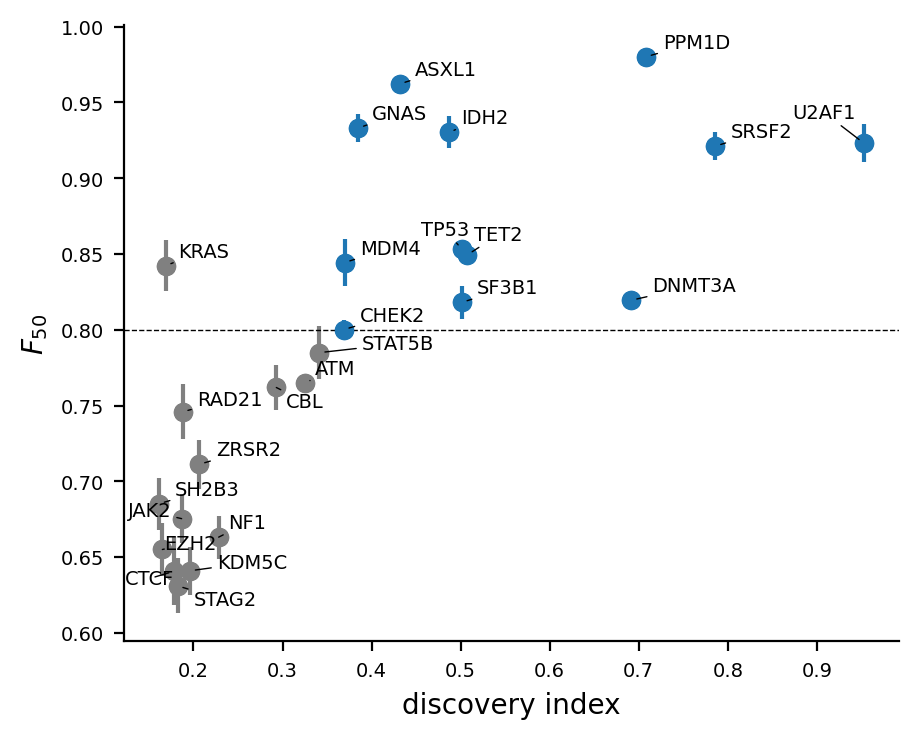

In [36]:
### All initial selected high-quality models
from adjustText import adjust_text

plt.rcParams["figure.figsize"] = (5,4)

x, y, e, labels = [], [], [], []
for gene in pre_models['Gene']:
    ttype = 'CH'
    #labels.append(f'{gene}\n({ttype})')
    labels.append(f'{gene}')
    x.append(get_discovery(gene, ttype))
    y.append(get_mean_fscore(gene, ttype)[1])
    e.append(get_std_fscore(gene,ttype))

mat_F50 = pd.DataFrame(list(zip(x, y, e, labels)), columns=['x', 'y', 'e', 'labels'])

fig, ax = plt.subplots()    

#Draw significant models, excluding KRAS
mat_F50_sig = mat_F50[mat_F50['y']>=0.8]
mat_F50_sig = mat_F50_sig[mat_F50_sig['labels']!='KRAS']

ax.scatter(mat_F50_sig['x'], mat_F50_sig['y'], color='tab:blue')
ax.errorbar(mat_F50_sig['x'], mat_F50_sig['y'], mat_F50_sig['e'], linestyle='None', marker='o', color='tab:blue')

#Draw non significant
mat_F50_non = mat_F50[(mat_F50['y']<0.8)|(mat_F50['labels']=='KRAS')]
ax.scatter(mat_F50_non['x'], mat_F50_non['y'], color='grey')
ax.errorbar(mat_F50_non['x'], mat_F50_non['y'], mat_F50_non['e'], linestyle='None', marker='o', color='grey')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.axhline(y=0.8, color='k', linestyle='--', linewidth=0.5)

texts = []
for a, b, c in zip(x, y, labels):
    texts.append(plt.text(a, b, c, size=7))
adjust_text(texts, expand_points=(1.5, 1.5), expand_text=(1,1),
            arrowprops=dict(arrowstyle="-", color='k', lw=0.5))

ax.set_xlabel('discovery index')
ax.set_ylabel('$F_{50}$')
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)

plt.show()

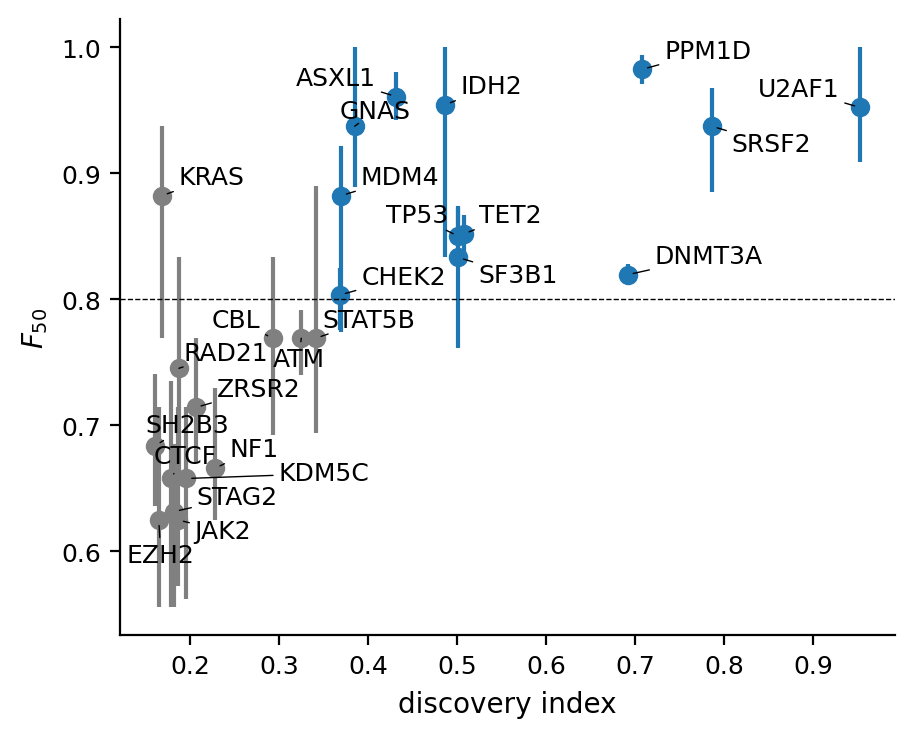

,x,y,q1,q3,labels
0,0.369706,0.882353,0.774291,0.921717,MDM4
1,0.708109,0.982644,0.970779,0.993686,PPM1D
2,0.501270,0.833333,0.761330,0.872785,SF3B1
3,0.431558,0.961065,0.942371,0.980861,ASXL1
4,0.501271,0.850210,0.833333,0.874215,TP53
5,0.786129,0.937500,0.884979,0.967742,SRSF2
6,0.952404,0.952381,0.909091,1.000000,U2AF1
16,0.486717,0.954545,0.833333,1.000000,IDH2
17,0.385098,0.937500,0.889037,1.000000,GNAS
18,0.368636,0.803550,0.775889,0.824742,CHEK2


In [37]:
### All initial selected high-quality models
from adjustText import adjust_text

plt.rcParams["figure.figsize"] = (5,4)

x, y, q1, q3, labels = [], [], [], [], []
for gene in pre_models['Gene']:
    ttype = 'CH'
    labels.append(f'{gene}')
    x.append(get_discovery(gene, ttype))
    y.append(get_median_fscore(gene, ttype)[1])
    q1.append(get_q1_12(gene, ttype)[0])
    q3.append(get_q1_12(gene, ttype)[1])

mat_F50 = pd.DataFrame(list(zip(x, y, q1, q3, labels)), columns=['x', 'y', 'q1', 'q3', 'labels'])

fig, ax = plt.subplots()    

#Draw significant
mat_F50_sig = mat_F50[mat_F50['y']>=0.8]
mat_F50_sig = mat_F50_sig[mat_F50_sig['labels']!='KRAS']

ax.scatter(mat_F50_sig['x'], mat_F50_sig['y'], color='tab:blue')
for idx, row in mat_F50_sig.iloc[::-1].iterrows():
    ci = [[row.y-row.q1], [row.q3-row.y]]
    plt.errorbar(row.x,row.y, yerr=ci, fmt=' ', ecolor = 'tab:blue')

#Draw non significant
mat_F50_non = mat_F50[(mat_F50['y']<0.8)|(mat_F50['labels']=='KRAS')]
ax.scatter(mat_F50_non['x'], mat_F50_non['y'], color='grey')
for idx, row in mat_F50_non.iloc[::-1].iterrows():
    ci = [[row.y-row.q1], [row.q3-row.y]]
    plt.errorbar(row.x,row.y, yerr=ci, fmt=' ', ecolor = 'grey')


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.axhline(y=0.8, color='k', linestyle='--', linewidth=0.5)

texts = []
for a, b, c in zip(x, y, labels):
    texts.append(plt.text(a, b, c, size=9))
adjust_text(texts, expand_points=(1.5, 1.5), expand_text=(1,1),
            arrowprops=dict(arrowstyle="-", color='k', lw=0.5))

ax.set_xlabel('discovery index')
ax.set_ylabel('$F_{50}$')
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.savefig('score-disc2.svg')

plt.show()
mat_F50_sig


### Try only DNMT3A

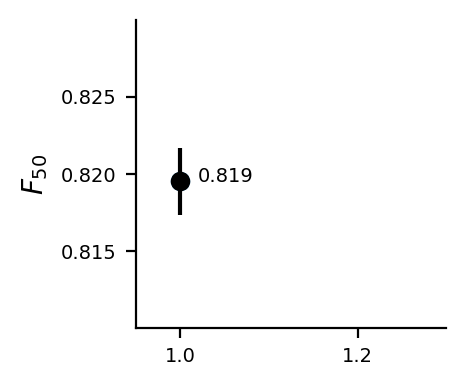

In [38]:
### All initial selected high-quality models
from adjustText import adjust_text
gene='DNMT3A'
plt.rcParams["figure.figsize"] = (2,2)

x, y, e, labels = [], [], [], []

#labels.append(f'{gene}\n({ttype})')
labels.append(f'{gene}')
y.append(get_mean_fscore(gene, ttype)[1])
e.append(get_std_fscore(gene,ttype))

fig, ax = plt.subplots()    
ax.set_ylabel('$F_{50}$')
ax.errorbar(1, y, e, linestyle='None', marker='o', color='black')
ax.scatter(1, y)
plt.text(1.02, y[0], round(y[0],3), size=7)


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.ylim((0.81,0.83))
plt.xlim((0.95,1.3))

plt.xticks(fontsize=7)
plt.yticks(np.arange(0.815, 0.825, 0.005), fontsize=7)
plt.show()

## Plots F-score vs number of mutations

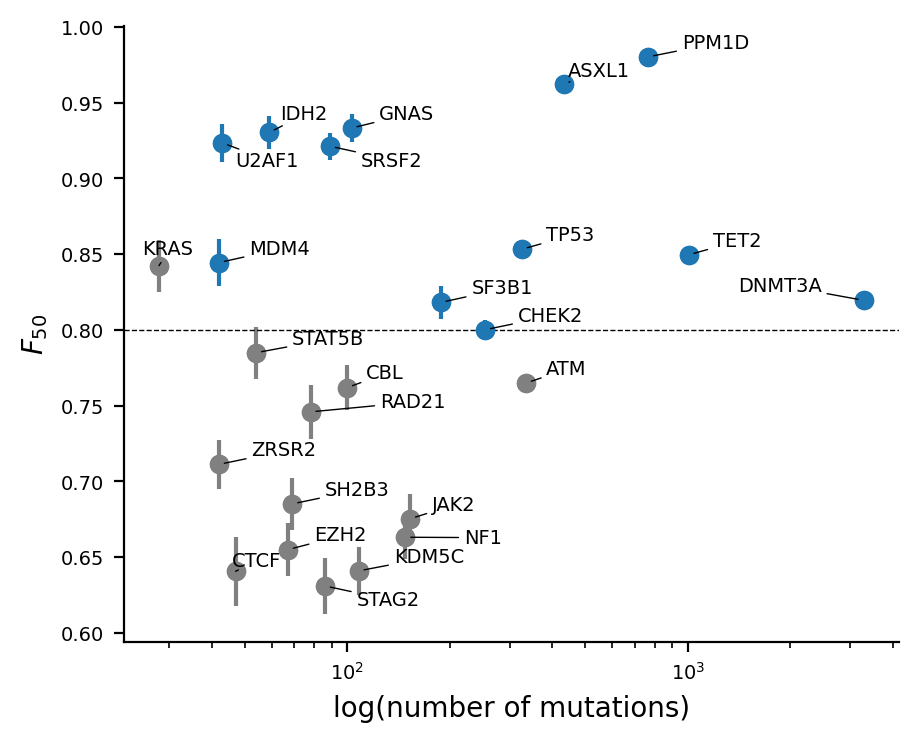

In [39]:
### All initial selected high-quality models
from adjustText import adjust_text

plt.rcParams["figure.figsize"] = (5,4)

x, y, e, labels = [], [], [], []
for gene in pre_models['Gene']:
    ttype = 'CH'
    labels.append(f'{gene}')
    x.append(int(discovery[discovery['gene'] == gene]['n_muts']))
    y.append(get_mean_fscore(gene, ttype)[1])
    e.append(get_std_fscore(gene,ttype))

mat_F50 = pd.DataFrame(list(zip(x, y, e, labels)), columns=['x', 'y', 'e', 'labels'])

fig, ax = plt.subplots()    

#Draw significant
mat_F50_sig = mat_F50[mat_F50['y']>=0.8]
mat_F50_sig = mat_F50_sig[mat_F50_sig['labels']!='KRAS']

ax.scatter(mat_F50_sig['x'], mat_F50_sig['y'], color='tab:blue')
ax.errorbar(mat_F50_sig['x'], mat_F50_sig['y'], mat_F50_sig['e'], linestyle='None', marker='o', color='tab:blue')

#Draw non significant
mat_F50_non = mat_F50[(mat_F50['y']<0.8)|(mat_F50['labels']=='KRAS')]
ax.scatter(mat_F50_non['x'], mat_F50_non['y'], color='grey')
ax.errorbar(mat_F50_non['x'], mat_F50_non['y'], mat_F50_non['e'], linestyle='None', marker='o', color='grey')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.axhline(y=0.8, color='k', linestyle='--', linewidth=0.5)
ax.set_xscale('log')

texts = []
for a, b, c in zip(x, y, labels):
    texts.append(plt.text(a, b, c, size=7))
adjust_text(texts, expand_points=(2, 1.5), expand_text=(1,1),
            arrowprops=dict(arrowstyle="-", color='k', lw=0.5))

ax.set_xlabel('log(number of mutations)')
ax.set_ylabel('$F_{50}$')
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.show()

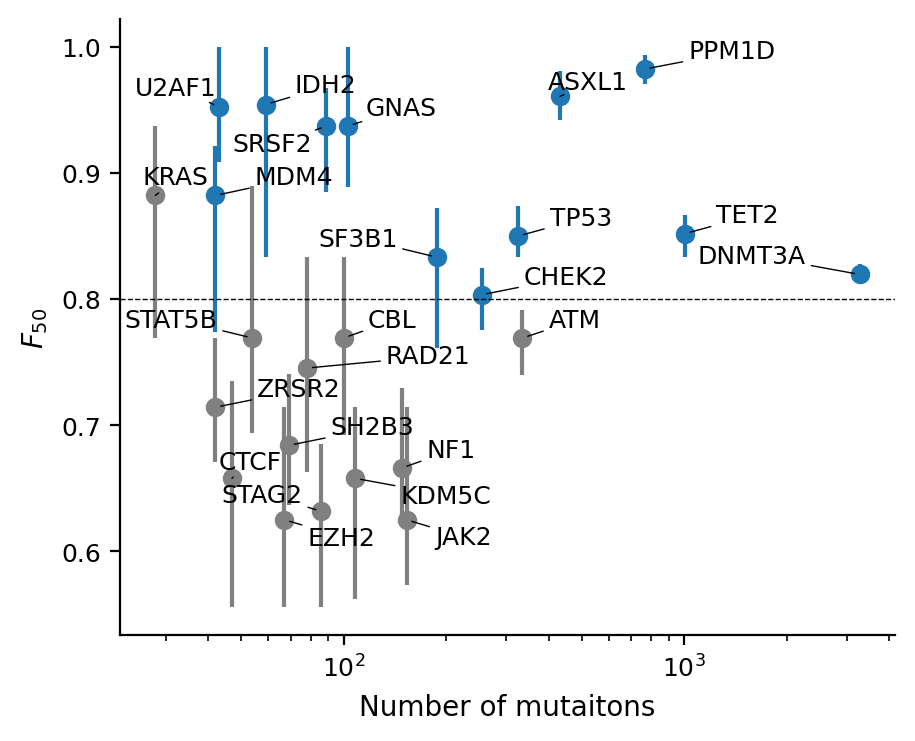

In [40]:
### All initial selected high-quality models
from adjustText import adjust_text

plt.rcParams["figure.figsize"] = (5,4)

x, y, q1, q3, labels = [], [], [], [], []
for gene in pre_models['Gene']:
    ttype = 'CH'
    labels.append(f'{gene}')
    x.append(int(discovery[discovery['gene'] == gene]['n_muts']))
    y.append(get_median_fscore(gene, ttype)[1])
    q1.append(get_q1_12(gene, ttype)[0])
    q3.append(get_q1_12(gene, ttype)[1])

mat_F50 = pd.DataFrame(list(zip(x, y, q1, q3, labels)), columns=['x', 'y', 'q1', 'q3', 'labels'])

fig, ax = plt.subplots()    

#Draw significant
mat_F50_sig = mat_F50[mat_F50['y']>=0.8]
mat_F50_sig = mat_F50_sig[mat_F50_sig['labels']!='KRAS']

ax.scatter(mat_F50_sig['x'], mat_F50_sig['y'], color='tab:blue')
for idx, row in mat_F50_sig.iloc[::-1].iterrows():
    ci = [[row.y-row.q1], [row.q3-row.y]]
    plt.errorbar(row.x,row.y, yerr=ci, fmt=' ', ecolor = 'tab:blue')
#Draw non significant
mat_F50_non = mat_F50[(mat_F50['y']<0.8)|(mat_F50['labels']=='KRAS')]
ax.scatter(mat_F50_non['x'], mat_F50_non['y'], color='grey')
for idx, row in mat_F50_non.iloc[::-1].iterrows():
    ci = [[row.y-row.q1], [row.q3-row.y]]
    plt.errorbar(row.x,row.y, yerr=ci, fmt=' ', ecolor = 'grey')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.axhline(y=0.8, color='k', linestyle='--', linewidth=0.5)
ax.set_xscale('log')

texts = []
for a, b, c in zip(x, y, labels):
    texts.append(plt.text(a, b, c, size=9))
adjust_text(texts, expand_points=(2, 1.5), expand_text=(1,1),
            arrowprops=dict(arrowstyle="-", color='k', lw=0.5))

ax.set_xlabel('Number of mutaitons')
ax.set_ylabel('$F_{50}$')
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.savefig('score-mut2.svg')
plt.show()